In [11]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

In [2]:
img1 = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("test2.png", cv2.IMREAD_GRAYSCALE)
with open("data/fieldmap_1040_1988_1") as f:
        bbox_map_1 = f.read().splitlines()
with open("data/fieldmap_1040_1988_2") as f:
        bbox_map_2 = f.read().splitlines() 

In [3]:
bbox_map_split_1 = []
for i in bbox_map_1:
    bbox_map_split_1.append(i.split())
    
bbox_map_split_2 = []
for i in bbox_map_2:
    bbox_map_split_2.append(i.split())

In [4]:
df_1 = pd.DataFrame(bbox_map_split_1, columns=['ENTRY_FIELD', 'TYPE', 'CONTEXT', 'FIELD_DESC', 'XMIN', 'YMIN', 'XMAX', 'YMAX'])
df_1['PAGE'] = 1
df_2 = pd.DataFrame(bbox_map_split_2, columns=['ENTRY_FIELD', 'TYPE', 'CONTEXT', 'FIELD_DESC', 'XMIN', 'YMIN', 'XMAX', 'YMAX'])
df_2['PAGE'] = 2

In [5]:
df = df_1.append(df_2)
df = df.reset_index()
df['ENTRY'] = np.empty((len(df), 0)).tolist()

In [6]:
def field_extract(df):
    for i in range (0, len(df)):
        if df["PAGE"][i] == 1:
            df["ENTRY"][i] = img1[int(df["YMIN"][i]):int(df["YMAX"][i]), int(df["XMIN"][i]):int(df["XMAX"][i])]
        if df["PAGE"][i] == 2:
            df["ENTRY"][i] = img2[int(df["YMIN"][i]):int(df["YMAX"][i]), int(df["XMIN"][i]):int(df["XMAX"][i])]

In [7]:
field_extract(df)

C:\Users\Chris\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Chris\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
df.head()

,index,ENTRY_FIELD,TYPE,CONTEXT,FIELD_DESC,XMIN,YMIN,XMAX,YMAX,PAGE,ENTRY
0,0,1040_1_L_H1_V1,A,DATA,TAX_MONTH_BEGINNING,862,202,1003,238,1,"[[8, 15, 0, 0, 64, 72, 80, 88, 0, 0, 0, 0, 0, ..."
1,1,1040_1_L_H2_V1,A,DATA,TAX_MONTH_ENDING,1127,202,1311,238,1,"[[162, 207, 215, 153, 0, 77, 48, 2, 16, 96, 80..."
2,2,1040_1_L_H3_V1,A,DATA,TAX_YEAR,1328,202,1417,238,1,"[[0, 0, 40, 0, 0, 0, 80, 88, 0, 0, 0, 0, 0, 0,..."
3,3,1040_1_L_H1_V2,A,NAME,NAME,420,259,1318,303,1,"[[48, 0, 0, 44, 234, 255, 255, 255, 255, 255, ..."
4,4,1040_1_L_H2_V2,A,SSN,SSN,1329,259,1620,303,1,"[[255, 255, 255, 255, 5, 0, 0, 0, 88, 255, 255..."


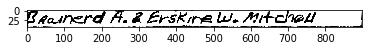

In [14]:
plt.imshow(df["ENTRY"][3], cmap='gray')